The following notebook contains all the code necessary compute the heat transport data presented in __Figure S6 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 CMIP6 preindustrial control output provided through the Earth System Grid Federation (ESGF) (Krasting et al., 2018):

> Krasting, J. P., and Coauthors, 2018a: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8669.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [2]:
esm4_ant1_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_olr = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*olr.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [3]:
esm4_ant1_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swdn_toa= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swdn_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [4]:
esm4_ant1_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swup_toa= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [5]:
esm4_ant1_swup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swup_sfc= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swup_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*swup_sfc.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [6]:
esm4_ant1_swdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swdn_sfc= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swdn_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*swdn_sfc.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [7]:
esm4_ant1_lwup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*lwup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_lwup_sfc= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_lwup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_lwup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_lwup_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwup_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_lwup_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*lwup_sfc.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [8]:
esm4_ant1_lwdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*lwdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_lwdn_sfc= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_lwdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_lwdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_lwdn_sfc = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwdn_sfc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_lwdn_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*lwdn_sfc.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [9]:
esm4_ant1_shflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_shflx= xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_shflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_shflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_shflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*shflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_shflx = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*shflx.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [10]:
esm4_ant1_evap = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*evap.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_evap = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*evap.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_evap = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*evap.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_evap = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*evap.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_evap = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*evap.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_evap = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*evap.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [11]:
esm4_ant1_snow_conv = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*snow_conv.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_snow_conv = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_conv.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_snow_conv = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_conv.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_snow_conv = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_conv.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_snow_conv = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_conv.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_snow_conv = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_conv.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [12]:
esm4_ant1_snow_ls = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*snow_ls.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_snow_ls = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_ls.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_snow_ls = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_ls.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_snow_ls = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_ls.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_snow_ls = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_ls.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_snow_ls = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*snow_ls.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [13]:
esm4_ant1_lwflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*lwflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_lwflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_lwflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_lwflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_lwflx = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*lwflx.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_lwflx = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*lwflx.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [14]:
esm4_ant1_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*precip.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

In [15]:
ant1_ASR_1 = esm4_ant1_swdn_toa.swdn_toa - esm4_ant1_swup_toa.swup_toa
ant2_ASR_1 = esm4_ant2_swdn_toa.swdn_toa - esm4_ant2_swup_toa.swup_toa
ant3_ASR_1 = esm4_ant3_swdn_toa.swdn_toa - esm4_ant3_swup_toa.swup_toa
ant4_ASR_1 = esm4_ant4_swdn_toa.swdn_toa - esm4_ant4_swup_toa.swup_toa
ant5_ASR_1 = esm4_ant5_swdn_toa.swdn_toa - esm4_ant5_swup_toa.swup_toa
piC_ASR_1 = (esm4_piC_swdn_toa.swdn_toa - esm4_piC_swup_toa.swup_toa).mean(dim='time')

ant1_TOP_1 = ant1_ASR_1 - esm4_ant1_olr.olr
ant2_TOP_1 = ant2_ASR_1 - esm4_ant2_olr.olr
ant3_TOP_1 = ant3_ASR_1 - esm4_ant3_olr.olr
ant4_TOP_1 = ant4_ASR_1 - esm4_ant4_olr.olr
ant5_TOP_1 = ant5_ASR_1 - esm4_ant5_olr.olr
piC_TOP_1 = (piC_ASR_1 - esm4_piC_olr.olr).mean(dim='time')

ant1_TOT_1 = ant1_TOP_1
ant2_TOT_1 = ant2_TOP_1
ant3_TOT_1 = ant3_TOP_1
ant4_TOT_1 = ant4_TOP_1
ant5_TOT_1 = ant5_TOP_1
piC_TOT_1 = (piC_TOP_1)

ant1_BOT_1 = esm4_ant1_swup_sfc.swup_sfc + esm4_ant1_lwup_sfc.lwup_sfc - esm4_ant1_swdn_sfc.swdn_sfc - esm4_ant1_lwdn_sfc.lwdn_sfc
ant2_BOT_1 = esm4_ant2_swup_sfc.swup_sfc + esm4_ant2_lwup_sfc.lwup_sfc - esm4_ant2_swdn_sfc.swdn_sfc - esm4_ant2_lwdn_sfc.lwdn_sfc
ant3_BOT_1 = esm4_ant3_swup_sfc.swup_sfc + esm4_ant3_lwup_sfc.lwup_sfc - esm4_ant3_swdn_sfc.swdn_sfc - esm4_ant3_lwdn_sfc.lwdn_sfc
ant4_BOT_1 = esm4_ant4_swup_sfc.swup_sfc + esm4_ant4_lwup_sfc.lwup_sfc - esm4_ant4_swdn_sfc.swdn_sfc - esm4_ant4_lwdn_sfc.lwdn_sfc
ant5_BOT_1 = esm4_ant5_swup_sfc.swup_sfc + esm4_ant5_lwup_sfc.lwup_sfc - esm4_ant5_swdn_sfc.swdn_sfc - esm4_ant5_lwdn_sfc.lwdn_sfc
piC_BOT_1 = (esm4_piC_swup_sfc.swup_sfc + esm4_piC_lwup_sfc.lwup_sfc - esm4_piC_swdn_sfc.swdn_sfc - esm4_piC_lwdn_sfc.lwdn_sfc).mean(dim='time')

ant1_LAT_1 = esm4_ant1_shflx.shflx + 2.6e6*esm4_ant1_evap.evap + 3.34e5*(esm4_ant1_snow_conv.snow_conv + esm4_ant1_snow_ls.snow_ls)
ant2_LAT_1 = esm4_ant2_shflx.shflx + 2.6e6*esm4_ant2_evap.evap + 3.34e5*(esm4_ant2_snow_conv.snow_conv + esm4_ant2_snow_ls.snow_ls)
ant3_LAT_1 = esm4_ant3_shflx.shflx + 2.6e6*esm4_ant3_evap.evap + 3.34e5*(esm4_ant3_snow_conv.snow_conv + esm4_ant3_snow_ls.snow_ls)
ant4_LAT_1 = esm4_ant4_shflx.shflx + 2.6e6*esm4_ant4_evap.evap + 3.34e5*(esm4_ant4_snow_conv.snow_conv + esm4_ant4_snow_ls.snow_ls)
ant5_LAT_1 = esm4_ant5_shflx.shflx + 2.6e6*esm4_ant5_evap.evap + 3.34e5*(esm4_ant5_snow_conv.snow_conv + esm4_ant5_snow_ls.snow_ls)
piC_LAT_1 = (esm4_piC_shflx.shflx + 2.6e6*esm4_piC_evap.evap + 3.34e5*(esm4_piC_snow_conv.snow_conv + esm4_piC_snow_ls.snow_ls)).mean(dim='time')

ant1_MOIST_1 = ant1_TOP_1 + ant1_BOT_1 + ant1_LAT_1
ant2_MOIST_1 = ant2_TOP_1 + ant2_BOT_1 + ant2_LAT_1
ant3_MOIST_1 = ant3_TOP_1 + ant3_BOT_1 + ant3_LAT_1
ant4_MOIST_1 = ant4_TOP_1 + ant4_BOT_1 + ant4_LAT_1
ant5_MOIST_1 = ant5_TOP_1 + ant5_BOT_1 + ant5_LAT_1
piC_MOIST_1 = piC_TOP_1 + piC_BOT_1 + piC_LAT_1

ant1_WET_1 = 2.5e6*(esm4_ant1_evap.evap - esm4_ant1_precip.precip) # latent heat make plot showing evap, precip and WET_1. 2.56e6 is latent heat release. Latent heat is J/s 
ant2_WET_1 = 2.5e6*(esm4_ant2_evap.evap - esm4_ant2_precip.precip)
ant3_WET_1 = 2.5e6*(esm4_ant3_evap.evap - esm4_ant3_precip.precip)
ant4_WET_1 = 2.5e6*(esm4_ant4_evap.evap - esm4_ant4_precip.precip)
ant5_WET_1 = 2.5e6*(esm4_ant5_evap.evap - esm4_ant5_precip.precip)
piC_WET_1 = (2.5e6*(esm4_piC_evap.evap - esm4_piC_precip.precip)).mean(dim='time')

ant1_DRY_1 = ant1_MOIST_1 - ant1_WET_1
ant2_DRY_1 = ant2_MOIST_1 - ant2_WET_1
ant3_DRY_1 = ant3_MOIST_1 - ant3_WET_1
ant4_DRY_1 = ant4_MOIST_1 - ant4_WET_1
ant5_DRY_1 = ant5_MOIST_1 - ant5_WET_1
piC_DRY_1 = piC_MOIST_1 - piC_WET_1

ant1_OHT_1 = (-1)*(ant1_BOT_1 + ant1_LAT_1)
ant2_OHT_1 = (-1)*(ant2_BOT_1 + ant2_LAT_1)
ant3_OHT_1 = (-1)*(ant3_BOT_1 + ant3_LAT_1)
ant4_OHT_1 = (-1)*(ant4_BOT_1 + ant4_LAT_1)
ant5_OHT_1 = (-1)*(ant5_BOT_1 + ant5_LAT_1)
piC_OHT_1 = (-1)*(piC_BOT_1 + piC_LAT_1)


In [17]:
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    warnings.warn(
        "standard_grid_cell_area is deprecated, use compute_area_regular_grid",
        DeprecationWarning,
    )

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [1]:
lat =  piC_TOP_1.coords['lat'].values  
lon =  piC_TOP_1.coords['lon'].values      
areacella = standard_grid_cell_area(lat,lon) 

### Compute ensemble means

In [19]:
moist_ens = xr.concat([ant1_MOIST_1,
                         ant2_MOIST_1,
                         ant3_MOIST_1,
                         ant4_MOIST_1,
                         ant5_MOIST_1],dim='member').mean(dim='member')

wet_ens = xr.concat([ant1_WET_1,
                         ant2_WET_1,
                         ant3_WET_1,
                         ant4_WET_1,
                         ant5_WET_1],dim='member').mean(dim='member')

dry_ens = xr.concat([ant1_DRY_1,
                         ant2_DRY_1,
                         ant3_DRY_1,
                         ant4_DRY_1,
                         ant5_DRY_1],dim='member').mean(dim='member')

tot_ens = xr.concat([ant1_TOT_1,
                         ant2_TOT_1,
                         ant3_TOT_1,
                         ant4_TOT_1,
                         ant5_TOT_1],dim='member').mean(dim='member')

oht_ens = xr.concat([ant1_OHT_1,
                         ant2_OHT_1,
                         ant3_OHT_1,
                         ant4_OHT_1,
                         ant5_OHT_1],dim='member').mean(dim='member')

In [20]:
ant1_moist_int = ((ant1_MOIST_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant2_moist_int = ((ant2_MOIST_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant3_moist_int = ((ant3_MOIST_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant4_moist_int = ((ant4_MOIST_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant5_moist_int = ((ant5_MOIST_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ens_moist_int = ((moist_ens * areacella).sum('lon')/ (10**15)).cumsum('lat')
piC_moist_int = ((piC_MOIST_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')

ant1_dry_int = ((ant1_DRY_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant2_dry_int = ((ant2_DRY_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant3_dry_int = ((ant3_DRY_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant4_dry_int = ((ant4_DRY_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant5_dry_int = ((ant5_DRY_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ens_dry_int = ((dry_ens * areacella).sum('lon')/ (10**15)).cumsum('lat')
piC_dry_int = ((piC_DRY_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')

ant1_wet_int = ((ant1_WET_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant2_wet_int = ((ant2_WET_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant3_wet_int = ((ant3_WET_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant4_wet_int = ((ant4_WET_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant5_wet_int = ((ant5_WET_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ens_wet_int = ((wet_ens * areacella).sum('lon')/ (10**15)).cumsum('lat')
piC_wet_int = ((piC_WET_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')

ant1_tot_int = ((ant1_TOT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant2_tot_int = ((ant2_TOT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant3_tot_int = ((ant3_TOT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant4_tot_int = ((ant4_TOT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant5_tot_int = ((ant5_TOT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ens_tot_int = ((tot_ens * areacella).sum('lon')/ (10**15)).cumsum('lat')
piC_tot_int = ((piC_TOT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')

ant1_oht_int = ((ant1_OHT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant2_oht_int = ((ant2_OHT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant3_oht_int = ((ant3_OHT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant4_oht_int = ((ant4_OHT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ant5_oht_int = ((ant5_OHT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')
ens_oht_int = ((oht_ens * areacella).sum('lon')/ (10**15)).cumsum('lat')
piC_oht_int = ((piC_OHT_1 * areacella).sum('lon')/ (10**15)).cumsum('lat')

## Save out computed fields

In [26]:
heat_trans = xr.Dataset()
heat_trans['tot_ant1_int'] = ant1_tot_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
heat_trans['tot_ant2_int'] = ant2_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['tot_ant3_int'] = ant3_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['tot_ant4_int'] = ant4_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['tot_ant5_int'] = ant5_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['tot_ens_int'] = ens_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['tot_piC_int'] = piC_tot_int

heat_trans['oht_ant1_int'] = ant1_oht_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
heat_trans['oht_ant2_int'] = ant2_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['oht_ant3_int'] = ant3_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['oht_ant4_int'] = ant4_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['oht_ant5_int'] = ant5_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['oht_ens_int'] = ens_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['oht_piC_int'] = piC_oht_int

heat_trans['wet_ant1_int'] = ant1_wet_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
heat_trans['wet_ant2_int'] = ant2_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['wet_ant3_int'] = ant3_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['wet_ant4_int'] = ant4_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['wet_ant5_int'] = ant5_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['wet_ens_int'] = ens_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['wet_piC_int'] = piC_wet_int

heat_trans['dry_ant1_int'] = ant1_dry_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
heat_trans['dry_ant2_int'] = ant2_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['dry_ant3_int'] = ant3_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['dry_ant4_int'] = ant4_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['dry_ant5_int'] = ant5_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['dry_ens_int'] = ens_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['dry_piC_int'] = piC_dry_int

heat_trans['moist_ant1_int'] = ant1_moist_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
heat_trans['moist_ant2_int'] = ant2_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['moist_ant3_int'] = ant3_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['moist_ant4_int'] = ant4_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['moist_ant5_int'] = ant5_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['moist_ens_int'] = ens_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
heat_trans['moist_piC_int'] = piC_moist_int

In [30]:
heat_trans.to_netcdf('esm4_heat_transport_components_antwater_exps.nc')

In [ ]:
heat_trans_ds = xr.open_dataset('esm4_heat_transport_components_antwater_exps.nc')

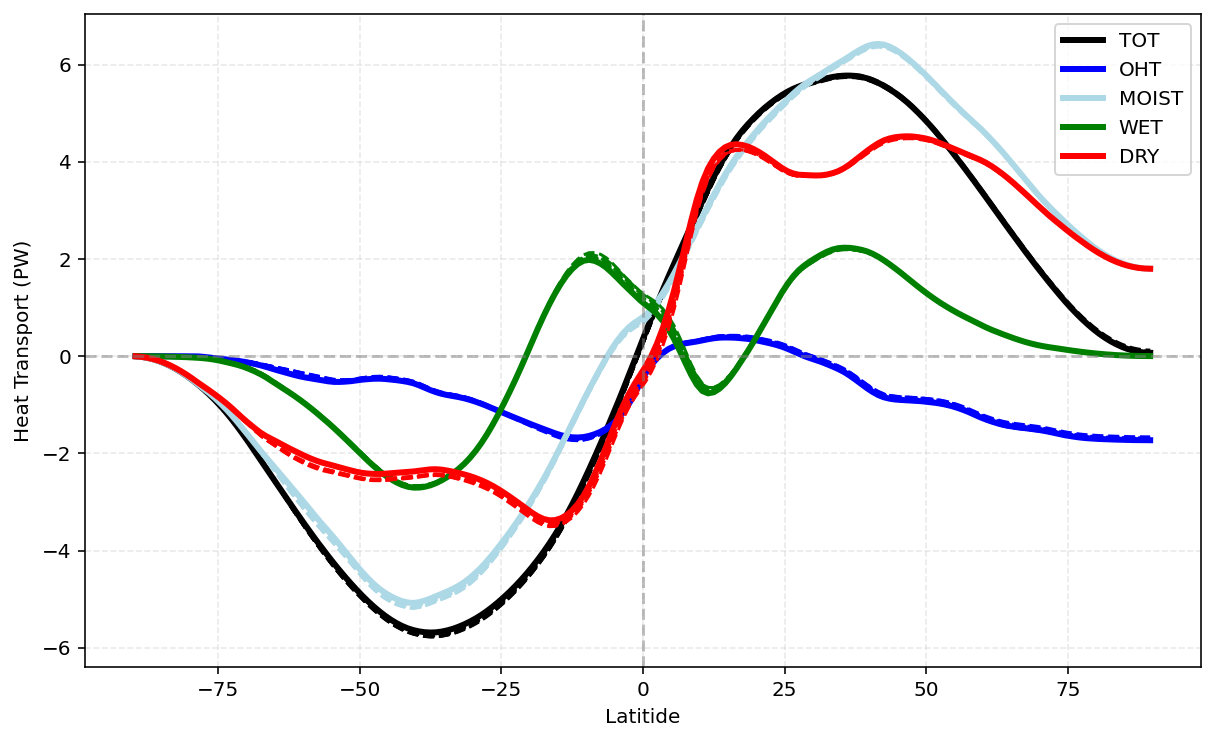

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

piC_tot_int.plot(label='TOT',linewidth=3,color='k')
ant1_tot_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time').plot(linestyle='--',color='k')
ant2_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='k')
ant3_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='k')
ant4_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='k')
ant5_tot_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='k')

piC_oht_int.plot(label='OHT',linewidth=3,color='blue')
ant1_oht_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time').plot(linestyle='--',color='blue')
ant2_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='blue')
ant3_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='blue')
ant4_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='blue')
ant5_oht_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='blue')

piC_moist_int.plot(label='MOIST',linewidth=3,color='lightblue')
ant1_moist_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time').plot(linestyle='--',color='lightblue')
ant2_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='lightblue')
ant3_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='lightblue')
ant4_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='lightblue')
ant5_moist_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='lightblue')

piC_wet_int.plot(label='WET',linewidth=3,color='green')
ant1_wet_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time').plot(linestyle='--',color='green')
ant2_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='green')
ant3_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='green')
ant4_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='green')
ant5_wet_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='green')

piC_dry_int.plot(label='DRY',linewidth=3,color='red')
ant1_dry_int.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time').plot(linestyle='--',color='red')
ant2_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='red')
ant3_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='red')
ant4_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='red')
ant5_dry_int.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot(linestyle='--',color='red')


plt.legend()

plt.axhline(0, color='grey', alpha=0.5, linestyle='--')
plt.axvline(0, color='grey', alpha=0.5, linestyle='--')
plt.ylabel("Heat Transport (PW)")
plt.xlabel("Latitide")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')